# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [111]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from typing import Callable
from sklearn.model_selection import train_test_split, ParameterGrid
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy import optimize

import matplotlib.pyplot as plt
import matplotlib
from typing import Union
import random

%matplotlib inline

random_seed = 42

In [112]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators: int, max_samples: float, max_depth: int, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """

        if n_estimators <= 0:
            raise RuntimeError("Number of estimators can't be 0 or less")
        self.n_estimators = n_estimators
        if max_samples <= 0 or max_samples > 1:
            raise RuntimeError("max samples must be in [0, 1)")
        # relative number of points - max_samples * rows = how many points in each tree
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs

        self.tree_models = []
        
    def fit(self, X: pd.DataFrame, y: Union[pd.DataFrame, pd.Series]):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """

        total_rows = len(X)
        points_per_tree = max(int(total_rows * self.max_samples), 2)

        if self.n_estimators > total_rows:
            raise RuntimeError("Number of estimators can't be greater than rows in the dataframe")

        for i in range(self.n_estimators):
            random_indexes = random.sample(range(total_rows), points_per_tree)
            random_X = X.iloc[random_indexes]
            random_Y = y.iloc[random_indexes]
            decision_tree = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            decision_tree.fit(random_X, random_Y)
            self.tree_models.append(decision_tree)

        return self
        
    def predict(self, X: pd.DataFrame):
        """
        Predikce y v zadaných bodech X
        """

        if not self.tree_models:
            return None

        ypredicted = np.zeros((X.shape[0],))

        for tree_model in self.tree_models:
            tree_output = tree_model.predict(X)
            ypredicted = np.add(tree_output, ypredicted)

        # return the average output
        return ypredicted / self.n_estimators


We're going to read the data.csv . Since Each line of the table represents information about a given country in a given year, we'll set
them as an index.

In [113]:
def load_prepare_data(file_name: str):
    df = pd.read_csv(file_name)
    # transforms status into binary. 0 = developed, 1 = developing
    df = pd.get_dummies(df, columns=['Status'], drop_first=True)
    df["year"] = df["Year"]
    df.set_index(["Country", "Year"], inplace=True)

    return df

df = load_prepare_data("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2718 entries, ('Afghanistan', 2015) to ('Zimbabwe', 2000)
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2718 non-null   float64
 1   Adult Mortality                  2718 non-null   float64
 2   infant deaths                    2718 non-null   int64  
 3   Alcohol                          2564 non-null   float64
 4   percentage expenditure           2718 non-null   float64
 5   Hepatitis B                      2188 non-null   float64
 6   Measles                          2718 non-null   int64  
 7   BMI                              2692 non-null   float64
 8   under-five deaths                2718 non-null   int64  
 9   Polio                            2700 non-null   float64
 10  Total expenditure                2529 non-null   float64
 11  Diphtheria                       2700 non-null  

As we can see, 13 columns have missing values. We'll plot each of them to see what distribution they have.

Also, we can see, that some columns could potentially be merged together. We have 2 columns with thinness, that have very similar values.
We also have 3 columns that depict vaccination. We could also merge those. This could help models, which precision gets degraded with introducing of new columns, like regression or KNN.

We'll try to predict on all columns, and then we'll try merging them and predict, which gives us better results.

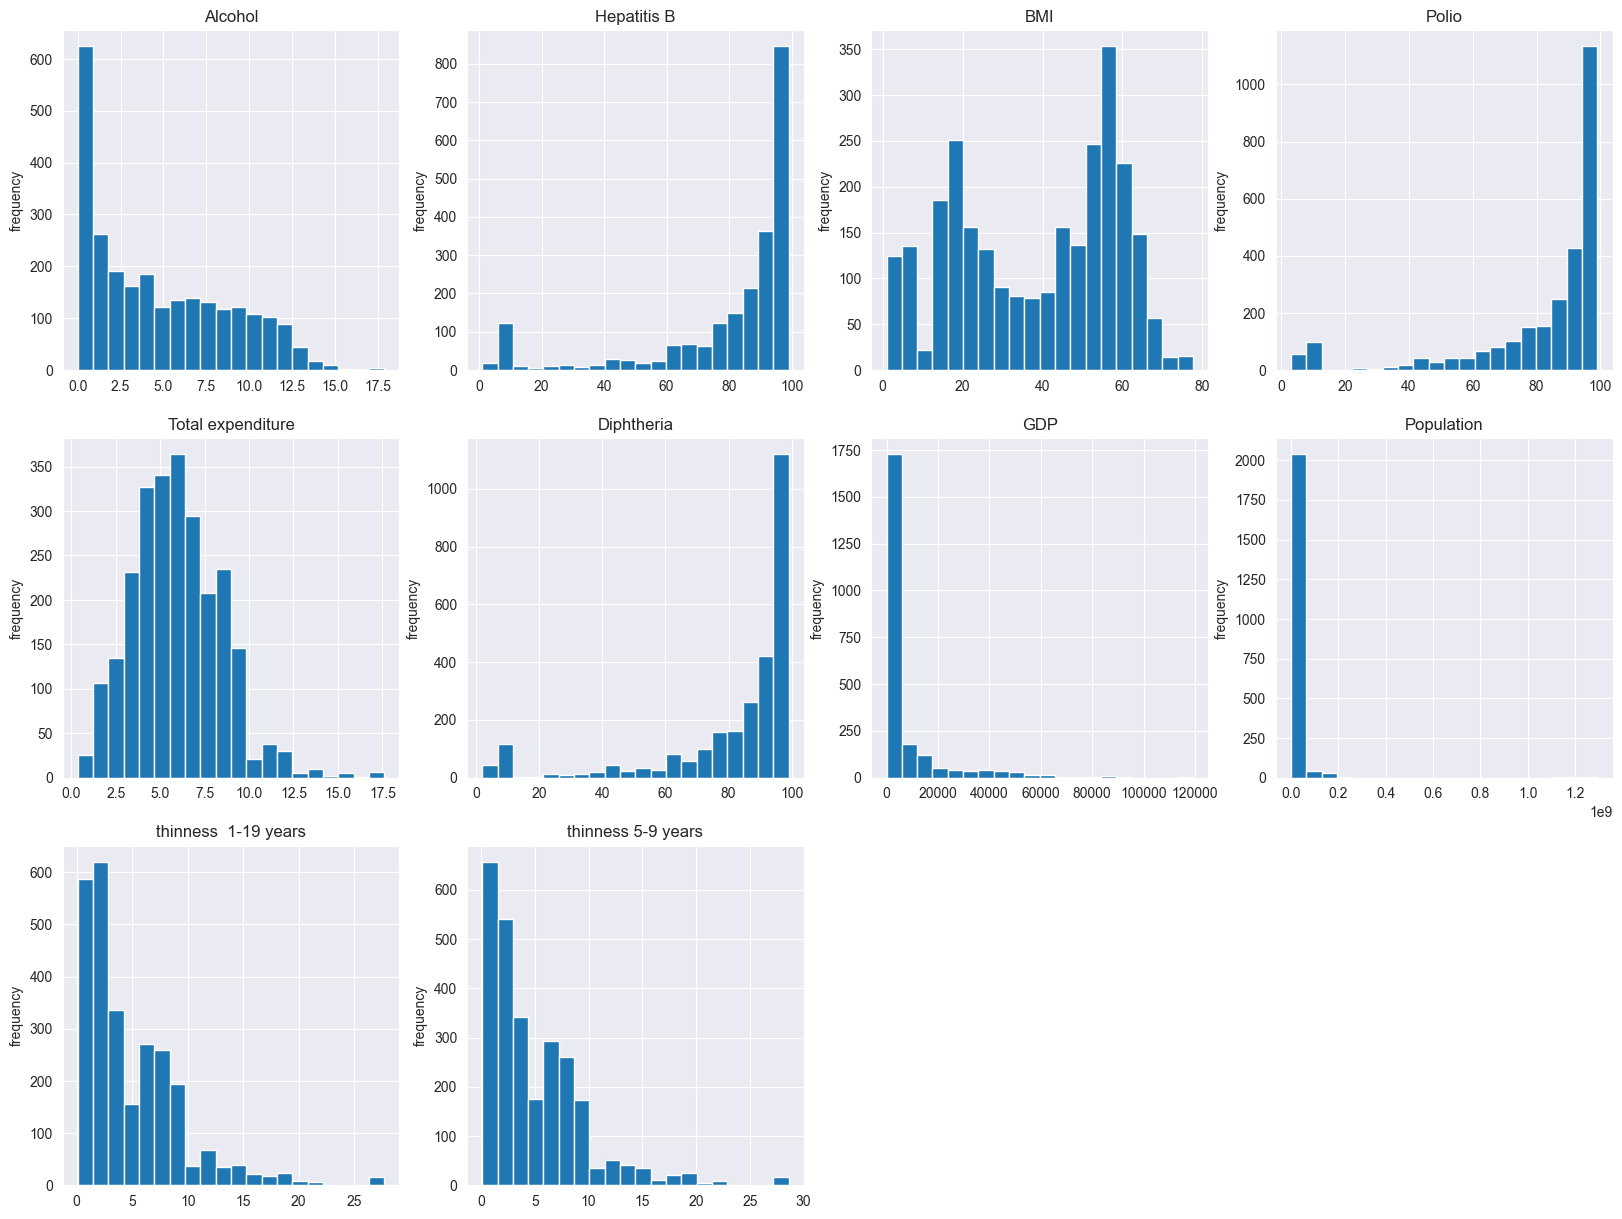

In [114]:
columns_to_plot = [
    "Alcohol", "Hepatitis B", "BMI", "Polio", "Total expenditure", "Diphtheria", "GDP", "Population",
    "thinness  1-19 years", "thinness 5-9 years"
]

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

ax = ax.flatten()

for i, col in enumerate(columns_to_plot):
    ax[i].hist(df[col], bins=20)
    ax[i].set_ylabel('frequency')
    ax[i].set_title(f'{col}')

fig.delaxes(ax[-2])
fig.delaxes(ax[-1])

plt.show()

Our data is not evenly distributed, that's why when predicting missing values, using median should give us better results.

Firstly, we split the data into train, validation and test.

In [115]:
# Split the training dataset into 60% train and 40% rest
Xtrain, Xrest, ytrain, yrest = train_test_split(df.drop(columns=['Life expectancy']), df['Life expectancy'], test_size=0.4, random_state=random_seed)

# Split the rest of the data into 0.6*0.4=24% validation, 0.4*0.4=16% test
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6, random_state=random_seed)

<h1>Predicting life expectancy for all columns</h1>

In this segment, we'll be predicting the life expectency for all columns, without merging any of them.

<h2>Handling missing data</h2>

Now we'll use IterativeImputer for predicting the missing values. Iterative imputer is a very powerful tool to fill the missing values, it firstly fills all missing values with a given function. Since we found out that median is better, we'll use that.

After initially filling the missing data with median, the imputer will take each column, and use Random forest regressor to predict the missing values of the given column, using all other ones. This process is repeated until either the imputer converges, and there are no new improvements, or max_iter is reached.

In [116]:
iterative_imputer_model = IterativeImputer(estimator=RandomForestRegressor(), random_state=random_seed, initial_strategy="median",
                                           max_iter=30)

iterative_imputer_model.fit(Xtrain)

def fill_missing_values(df: pd.DataFrame):

    filled_values = iterative_imputer_model.transform(df)
    return pd.DataFrame(filled_values, columns=df.columns, index=df.index)


Xtrain = fill_missing_values(Xtrain)
Xval = fill_missing_values(Xval)

/Library/Python/3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<h2>Predicting Life expectancy</h2>

We're going to use 3 models to predict Life expectancy of the country in a given year:
* Random forest
* Ridge regression
* KNN


<h3>Random forest regressor</h3>

Firstly, we're going to use the random forest regressor. It's a model containing multiple tree models (DecisionTreeRegressor).
We're picking random rows from our data, and feeding them into the trees for training and prediction. During the prediction time,
we take the average of each tree model. This method is called bagging.

Random forest regressor is good for complex data with difficult relationships between them. Since we're also averaging the values, the risk
of overfitting is also greatly reduced compared to individual tree. The big strength of this model is, that it doesn't assume linear
relationships between columns.

This model should perform well on these datas, even without merging the columns into more general ones. It should be able to pick the correct
columns and relationships to focus on, even if some are highly correlated. This model should perform the best on these data if there's
an important non-linear relationships between them compared to ridge regression and KNN.

The big downside of this model is, that it's very slow to compute. Training each individual tree of the forest takes a long time. It takes
hours for to find the optimal hyperparameters in these data. Also, if these datas were linearly correlated, regression could outperform this
model.

In [117]:
def find_best_hyperparameters(model: Callable, param_grid: dict, X_train: pd.DataFrame, Y_train: pd.DataFrame,
                              X_val: pd.DataFrame, Y_val: pd.DataFrame, model_name: str) -> dict:

    param_comb = ParameterGrid(param_grid)

    val_metric = []
    for params in param_comb:
        clf = model(**params).fit(X_train, Y_train)
        model_RMSE = metrics.mean_squared_error(Y_val, clf.predict(X_val), squared=False)
        val_metric.append(model_RMSE)

    best_params = param_comb[np.argmin(val_metric)]
    print(f"We found the best params {best_params} with validation RMSE {min(val_metric):.4f} for {model_name}.")

    return best_params


In [118]:
param_grid_random_forest = {
    'n_estimators': range(5, 80, 5),
    'max_depth': range(3, 25),
    'max_samples': [i / 100 for i in range(5, 100, 5)],
    'random_state': [random_seed]
}

best_params_random_forest = find_best_hyperparameters(CustomRandomForest, param_grid_random_forest, Xtrain, ytrain,
                                                      Xval, yval, "Random Forest Regressor")


We found the best params {'random_state': 42, 'n_estimators': 70, 'max_samples': 0.9, 'max_depth': 22} with validation RMSE 1.8438 for Random Forest Regressor.


In [119]:
standard_scaler = StandardScaler().fit(Xtrain)
df = standard_scaler.transform(Xtrain)
Xtrain_standard = pd.DataFrame(df, index=Xtrain.index, columns=Xtrain.columns)
df = standard_scaler.transform(Xval)
Xval_standard = pd.DataFrame(df, index=Xval.index, columns=Xval.columns)

best_params_random_forest_standard = find_best_hyperparameters(CustomRandomForest, param_grid_random_forest, Xtrain_standard, ytrain,
                                                               Xval_standard, yval, "Random Forest Regressor with standard scaler")

We found the best params {'random_state': 42, 'n_estimators': 60, 'max_samples': 0.85, 'max_depth': 19} with validation RMSE 1.8528 for Random Forest Regressor with standard scaler.


In [120]:
minmax_scaler = MinMaxScaler().fit(Xtrain)
df = minmax_scaler.transform(Xtrain)
Xtrain_minmax = pd.DataFrame(df, index=Xtrain.index, columns=Xtrain.columns)
df = minmax_scaler.transform(Xval)
Xval_minmax = pd.DataFrame(df, index=Xval.index, columns=Xval.columns)

best_params_random_forest_minmax = find_best_hyperparameters(CustomRandomForest, param_grid_random_forest, Xtrain_minmax, ytrain,
                                                             Xval_minmax, yval, "Random Forest Regressor with minmax scaler")

We found the best params {'random_state': 42, 'n_estimators': 60, 'max_samples': 0.9, 'max_depth': 16} with validation RMSE 1.8329 for Random Forest Regressor with minmax scaler.


<h3>Ridge regression</h3>

Linear regression assumes linear relationships between all columns. Coefficients are used to represent relationships between the columns.
We're finding the best fitting curve of given points by minimizing the sum of the squares of the offsets of the points from the curve.

Linear regression can suffer when some columns are correlated (they have very similar values / represent similar information), the variance can
increase and the precision of the predictions can suffer.
Since our dataset does contain correlated columns, like thinness 5-9 years, thinness 10-19 years or vaccinations, our predictions could be
incorrect, where small change in the data could produce big changes in the predictions. That's why we're using ridge regression, trying to
counter that scenario with changing alpha. Ridge regression tries to penalize the multicollinearity and thus decreasing the risk of incorrect predictions.

Merging the correlated columns could help the regression, as we'll do later.

As stated before, if the relationships between the columns are non-linear, this model won't produce the best results. Since Random Forest doesn't assume the
linearity, it could greatly outperform the ridge regression.

Firstly, we'll try to predict without normalization, and then with using standard scaler and minmax scaler. Since the data is not evenly
distributed, and we have huge outliners, normalization should be a good idea.

In [121]:
def get_best_ridge_model(Xtrain, ytrain, Xval, yval, also_plot=False):
    def ridgemodel_eval(alpha):
        if alpha == 0:
            # the Ridge library said that we should use LinearRegression if alpha is 0
            clf = LinearRegression()
        else:
            clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return metrics.mean_squared_error(yval, clf.predict(Xval), squared=False)

    if also_plot:
        alphas = np.linspace(0,500,100)
        alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
        plt.plot(alphas, alphas_res, '.')
        plt.xlabel("alpha")
        plt.ylabel("RMSE")
        plt.show()

    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options={'maxiter': 30}, method='bounded', bounds=(0, 400))

    if opt_alpha.x == 0:
        opt_model = LinearRegression()
    else:
        opt_model = Ridge(alpha=opt_alpha.x)
    opt_model.fit(Xtrain, ytrain)
    return opt_model, opt_alpha.x

In [122]:
best_ridge_model, best_alpha = get_best_ridge_model(Xtrain, ytrain, Xval, yval)

RMSE = metrics.mean_squared_error(yval, best_ridge_model.predict(Xval), squared=False)
print(f'Optimal alpha for Ridge regression without normalization: {best_alpha}, with RMSE: {RMSE}')


/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.62572e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.0358e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.44061e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.45813e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcon

Optimal alpha for Ridge regression without normalization: 2.3944880530668047, with RMSE: 4.067583737792519


/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.81737e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.82085e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.82099e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.82098e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rco

As we can see even from the warnings, using normalization is the way to go.

In [123]:
best_ridge_model_standard, best_alpha = get_best_ridge_model(Xtrain_standard, ytrain, Xval_standard, yval)

RMSE = metrics.mean_squared_error(yval, best_ridge_model_standard.predict(Xval_standard), squared=False)
print(f'Optimal alpha for Ridge regression with standard scaler: {best_alpha}, with RMSE: {RMSE}')


Optimal alpha for Ridge regression with standard scaler: 0.0002149961999422286, with RMSE: 4.068592946746255


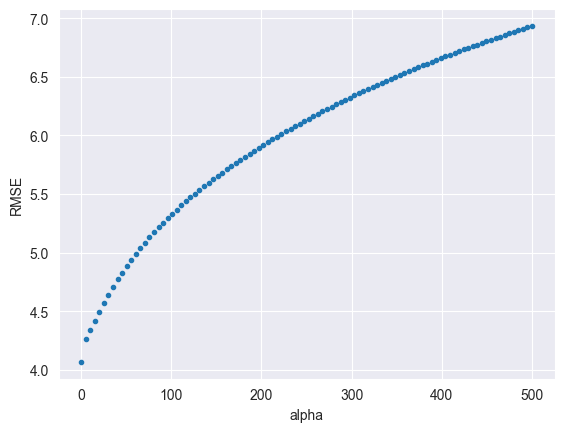

Optimal alpha for Ridge regression with minmax scaler: 0.0002149961999422286, with RMSE: 4.068889916150965


In [124]:
best_ridge_model_minmax, best_alpha = get_best_ridge_model(Xtrain_minmax, ytrain, Xval_minmax, yval, also_plot=True)

RMSE = metrics.mean_squared_error(yval, best_ridge_model_minmax.predict(Xval_minmax), squared=False)
print(f'Optimal alpha for Ridge regression with minmax scaler: {best_alpha}, with RMSE: {RMSE}')


Wow, RMSE ended up being very similar with and without normalization. The only thing that has changed was alpha. It looks like we needed to penalize the outliners
with the higher alpha when not using normalization. After normalization, we seem to no longer need alpha and classic regression could be better.

I'd still use normalization with regular regression, because normalization is the principled thing to do here, but the results were definitely interesting.

<h3>K Nearest Neighbours</h3>

It's a method of finding k nearest neighbors of a point and from their predicted value predicting the value of our point.

Advantages:
KNN is useful when the relationship between the columns is non-linear compared to regression.
We don't make any assumptions about the data (unlike trees), so it tends to do well with overfitting and bias.

Disadvantages:
KNN has a well known phenomenon, Curse of dimensionality - the more columns we have, the further away our data are from each other and our performance is
decreasing. Correlated columns could also decrease KNN's predictive capabilities and picking the wrong neighbors.
Large datasets would require a lot more computational power to predict than trees.


Just like for regression, KNN tends to do better with normalized data, especially when they're not evenly distributed.

We'll first try without normalization and then with, comparing the results.

In [125]:
param_grid_knn = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    "p": [1, 2],  # manhattan_distance, euclidean_distance
}

best_params_knn = find_best_hyperparameters(KNeighborsRegressor, param_grid_knn, Xtrain, ytrain, Xval, yval, "KNN")


We found the best params {'weights': 'distance', 'p': 1, 'n_neighbors': 22} with validation RMSE 8.9984 for KNN.


In [126]:
best_params_knn_standard = find_best_hyperparameters(KNeighborsRegressor, param_grid_knn, Xtrain_standard, ytrain,
                                                     Xval_standard, yval, "KNN standard scaler")


We found the best params {'weights': 'distance', 'p': 1, 'n_neighbors': 4} with validation RMSE 2.4262 for KNN standard scaler.


In [127]:
best_params_knn_minmax = find_best_hyperparameters(KNeighborsRegressor, param_grid_knn, Xtrain_minmax, ytrain,
                                                   Xval_minmax, yval, "KNN minmax scaler")

We found the best params {'weights': 'distance', 'p': 1, 'n_neighbors': 3} with validation RMSE 2.5931 for KNN minmax scaler.


This time without shock, KNN with normalization performed a lot better than without, with standard scaler having the best RMSE.

<h1>Predicting with merging columns</h1>

In [128]:
def merge_columns(df: pd.DataFrame) -> pd.DataFrame:
    df["thinness_children"] = df[["thinness 5-9 years", "thinness  1-19 years"]].mean(axis=1)
    df["vaccination"] = df[["Hepatitis B", "Polio", "Diphtheria"]].mean(axis=1)

    return df.drop(["thinness 5-9 years", "thinness  1-19 years", "Hepatitis B", "Polio", "Diphtheria"], axis=1)

Xtrain_merged = merge_columns(Xtrain)
Xval_merged = merge_columns(Xval)

Xtrain_merged

,,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Status_Developing,year,thinness_children,vaccination
Country,Year,,,,,,,,,,,,,,,,,
Barbados,2010,16.0,0.0,8.4100,154.963086,0.0,5.7,0.0,6.17,0.1,1595.912320,1418880.95,0.781,15.8,1.0,2010.0,3.80,60.333333
Chad,2010,364.0,46.0,0.5000,43.573289,194.0,17.1,80.0,2.95,4.1,896.569734,1188722.00,0.360,6.7,1.0,2010.0,9.35,40.333333
Venezuela (Bolivarian Republic of),2013,159.0,9.0,6.7100,0.000000,0.0,61.0,10.0,4.94,0.1,2728.189730,15922021.16,0.770,14.2,1.0,2013.0,1.55,82.000000
Eritrea,2005,34.0,7.0,1.0700,5.064689,19.0,13.9,9.0,2.97,1.6,276.758960,39697.00,0.000,5.4,1.0,2005.0,9.45,96.000000
Namibia,2005,477.0,3.0,4.8900,457.720052,4.0,27.9,4.0,7.32,22.1,3573.146387,232196.00,0.565,11.6,1.0,2005.0,13.10,80.823333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mozambique,2011,47.0,66.0,0.9400,40.806180,177.0,2.9,94.0,6.23,9.6,526.531352,249395.00,0.397,9.5,1.0,2011.0,3.65,75.000000
India,2002,219.0,1700.0,1.1000,17.812056,40044.0,12.2,2300.0,4.40,0.3,466.284200,18987112.00,0.499,8.4,1.0,2002.0,27.90,50.710000
Iraq,2009,148.0,32.0,0.2000,185.636698,30328.0,55.2,39.0,4.65,0.1,3735.144836,29894652.00,0.643,10.3,1.0,2009.0,5.25,77.000000


In [129]:
best_params_random_forest_merged = find_best_hyperparameters(CustomRandomForest, param_grid_random_forest, Xtrain_merged, ytrain,
                                                             Xval_merged, yval, "Random Forest Regressor merged columns")


We found the best params {'random_state': 42, 'n_estimators': 25, 'max_samples': 0.85, 'max_depth': 20} with validation RMSE 1.8611 for Random Forest Regressor merged columns.


In [130]:
standard_scaler_merged = StandardScaler().fit(Xtrain_merged)
df = standard_scaler_merged.transform(Xtrain_merged)
Xtrain_standard_merged = pd.DataFrame(df, index=Xtrain_merged.index, columns=Xtrain_merged.columns)
df = standard_scaler_merged.transform(Xval_merged)
Xval_standard_merged = pd.DataFrame(df, index=Xval_merged.index, columns=Xval_merged.columns)

minmax_scaler_merged = MinMaxScaler().fit(Xtrain_merged)
df = minmax_scaler_merged.transform(Xtrain_merged)
Xtrain_minmax_merged = pd.DataFrame(df, index=Xtrain_merged.index, columns=Xtrain_merged.columns)
df = minmax_scaler_merged.transform(Xval_merged)
Xval_minmax_merged = pd.DataFrame(df, index=Xval_merged.index, columns=Xval_merged.columns)

In [131]:
best_params_random_forest_standard_merged = find_best_hyperparameters(CustomRandomForest, param_grid_random_forest, Xtrain_standard_merged,
                                                                      ytrain, Xval_standard_merged, yval, "Random Forest Regressor with "
                                                                                                          "standard scaler merged columns")

We found the best params {'random_state': 42, 'n_estimators': 40, 'max_samples': 0.9, 'max_depth': 15} with validation RMSE 1.8587 for Random Forest Regressor with standard scaler merged columns.


In [132]:
best_params_random_forest_minmax_merged = find_best_hyperparameters(CustomRandomForest, param_grid_random_forest, Xtrain_minmax_merged,
                                                                      ytrain, Xval_minmax_merged, yval, "Random Forest Regressor with "
                                                                                                        "minmax scaler merged columns")

We found the best params {'random_state': 42, 'n_estimators': 30, 'max_samples': 0.8, 'max_depth': 20} with validation RMSE 1.8692 for Random Forest Regressor with minmax scaler merged columns.


In [133]:
best_ridge_model_merged, best_alpha = get_best_ridge_model(Xtrain_merged, ytrain, Xval_merged, yval)

RMSE = metrics.mean_squared_error(yval, best_ridge_model_merged.predict(Xval_merged), squared=False)
print(f'Optimal alpha for Ridge regression without normalization: {best_alpha}, with RMSE: {RMSE}')

Optimal alpha for Ridge regression without normalization: 2.3235432444046547, with RMSE: 4.0720946599855115


/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.65019e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.05426e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.45515e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.47016e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Python/3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rco

In [134]:
best_ridge_model_standard_merged, best_alpha = get_best_ridge_model(Xtrain_standard_merged, ytrain, Xval_standard_merged, yval)

RMSE = metrics.mean_squared_error(yval, best_ridge_model_standard_merged.predict(Xval_standard_merged), squared=False)
print(f'Optimal alpha for Ridge regression with standard scaler: {best_alpha}, with RMSE: {RMSE}')


Optimal alpha for Ridge regression with standard scaler: 0.0002149961999422286, with RMSE: 4.07310128240844


In [135]:
best_ridge_model_minmax_merged, best_alpha = get_best_ridge_model(Xtrain_minmax_merged, ytrain, Xval_minmax_merged, yval)

RMSE = metrics.mean_squared_error(yval, best_ridge_model_minmax_merged.predict(Xval_minmax_merged), squared=False)
print(f'Optimal alpha for Ridge regression with minmax scaler: {best_alpha}, with RMSE: {RMSE}')


Optimal alpha for Ridge regression with minmax scaler: 0.0002149961999422286, with RMSE: 4.073388419669769


Looks like Ridge regression with standard scaler performs similarly when columns are merged and not merged. It looks like ridge regression is able to
handle the correlativity of columns well.

In [136]:
best_params_knn_merged = find_best_hyperparameters(KNeighborsRegressor, param_grid_knn, Xtrain_merged, ytrain,
                                                   Xval_merged, yval, "KNN merged columns")

We found the best params {'weights': 'distance', 'p': 1, 'n_neighbors': 22} with validation RMSE 9.0017 for KNN merged columns.


In [137]:
best_params_knn_standard_merged = find_best_hyperparameters(KNeighborsRegressor, param_grid_knn, Xtrain_standard_merged, ytrain,
                                                            Xval_standard_merged, yval, "KNN standard scaler merged columns")


We found the best params {'weights': 'distance', 'p': 1, 'n_neighbors': 3} with validation RMSE 2.2377 for KNN standard scaler merged columns.


In [138]:
best_params_knn_minmax_merged = find_best_hyperparameters(KNeighborsRegressor, param_grid_knn, Xtrain_minmax_merged, ytrain,
                                                          Xval_minmax_merged, yval, "KNN minmax scaler merged columns")


We found the best params {'weights': 'distance', 'p': 1, 'n_neighbors': 4} with validation RMSE 2.4287 for KNN minmax scaler merged columns.


Looks like KNN with standard normalization with merged columns performed better than without the merged columns. It makes sense because it's less columns to
predict and KNN isn't the best at dealing with correlated columns.